In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('../../welddb/welddb_cleaned_for_pca.csv')

In [10]:
# drop all other target columns

df = df.drop(columns=['Ultimate tensile strength (MPa)', 'Yield strength (MPa)',
       'Charpy impact toughness (J)', 'Hardness (kgmm-2)', '50 % FATT',
       'Charpy temperature (deg C)',
       'Elongation (%)', 'Hardness (kgmm-2)', '50 % FATT',
       'Primary ferrite in microstructure (%)',
       'Ferrite with second phase (%)', 'Acicular ferrite (%)',
       'Martensite (%)', 'Ferrite with carbide aggregate (%)'])


In [11]:
target = 'Reduction of Area (%)'
trgt= 'Reduction_of_area'

In [12]:
# Filter the dataset to include only rows where target is not missing
df_target = df[df[target].notna()]

# Check the shape of the dataset after filtering
df_target.shape


(705, 40)

In [13]:
# Count the number of missing values in each column before the imputation
missing_values_before_imputation = df_target.isnull().sum()
missing_values_before_imputation = missing_values_before_imputation[missing_values_before_imputation > 0]

# Display the columns that had missing values and their counts
missing_values_before_imputation


Post weld heat treatment temperature (deg C)     13
Post weld heat treatment time (hours)            13
Puissance (W)                                   113
dtype: int64

In [14]:
from sklearn.experimental import enable_iterative_imputer  # Required for Iterative Imputer
from sklearn.impute import IterativeImputer

# Initialize the Iterative Imputer
iterative_imputer = IterativeImputer()

# Apply the iterative imputer on the dataset (excluding the target target)
df_features = df_target.drop(columns=[target])
df_imputed_iterative = pd.DataFrame(iterative_imputer.fit_transform(df_features), columns=df_features.columns)

# Add back the target target
df_imputed_iterative[target] = df_target[target].values

# Display the first few rows of the imputed dataset
df_imputed_iterative.head()


,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Copper concentration (weight%),...,Type of weld_GTAA,Type of weld_MMA,Type of weld_NGGMA,Type of weld_NGSAW,Type of weld_SA,Type of weld_SAA,Type of weld_ShMA,Type of weld_TSA,Puissance (W),Reduction of Area (%)
0,-1.612394,-0.254200,-1.447095,-0.136415,-0.048693,-0.318155,-0.427452,-0.56357,-0.146903,-0.289924,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.527791,80.6
1,-1.612394,-0.254200,-1.447095,-0.136415,-0.048693,-0.318155,-0.427452,-0.56357,-0.146903,-0.289924,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.527791,80.6
2,-1.612394,-0.165249,-0.452386,-0.225627,0.053550,-0.318155,-0.427452,-0.56357,-0.146903,-0.289924,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.527791,80.6
3,-1.612394,-0.165249,-0.452386,-0.225627,0.053550,-0.318155,-0.427452,-0.56357,-0.146903,-0.289924,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.527791,80.6
4,-1.319395,0.190556,0.594677,-0.225627,0.053550,-0.318155,-0.427452,-0.56357,-0.146903,-0.289924,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.527791,78.7


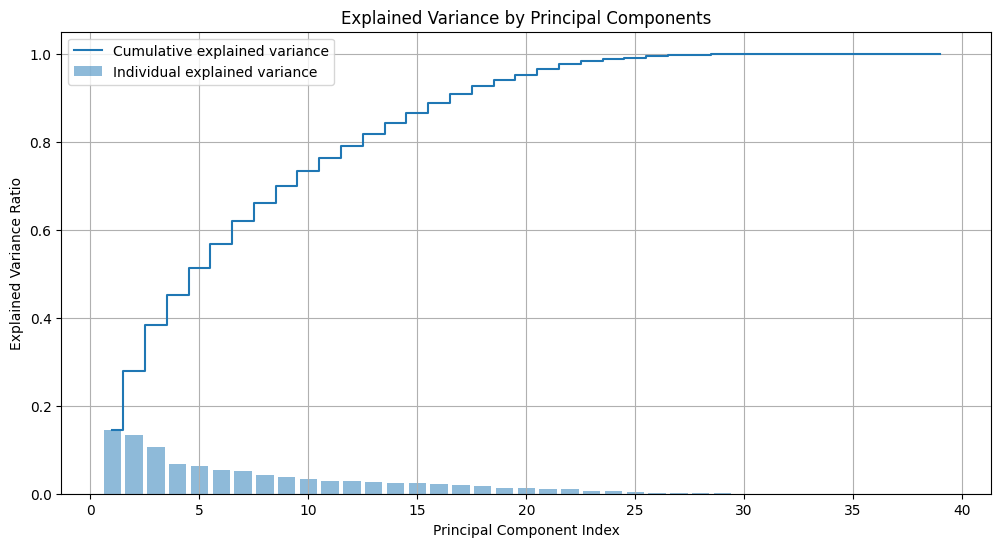

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


# Perform PCA on the imputed dataset (excluding the target target)
pca = PCA()
df_features_imputed = df_imputed_iterative.drop(columns=[target])
pca.fit(df_features_imputed)

# Calculate the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio for each principal component (individual and cumulative)
plt.figure(figsize=(12, 6))

# Individual explained variance
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')

# Cumulative explained variance
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid', label='Cumulative explained variance')

plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Nous allons adresser un nombre minimal de components qui peuvent nous permettre de capturer 90% de la variance

In [16]:
# Calculate the cumulative explained variance and find the number of components to reach 90%
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components_to_90 = np.argmax(cumulative_variance >= 0.90) + 1  # Add 1 because index starts at 0

# Display the number of components required to capture 90% of the variance
num_components_to_90


np.int64(17)

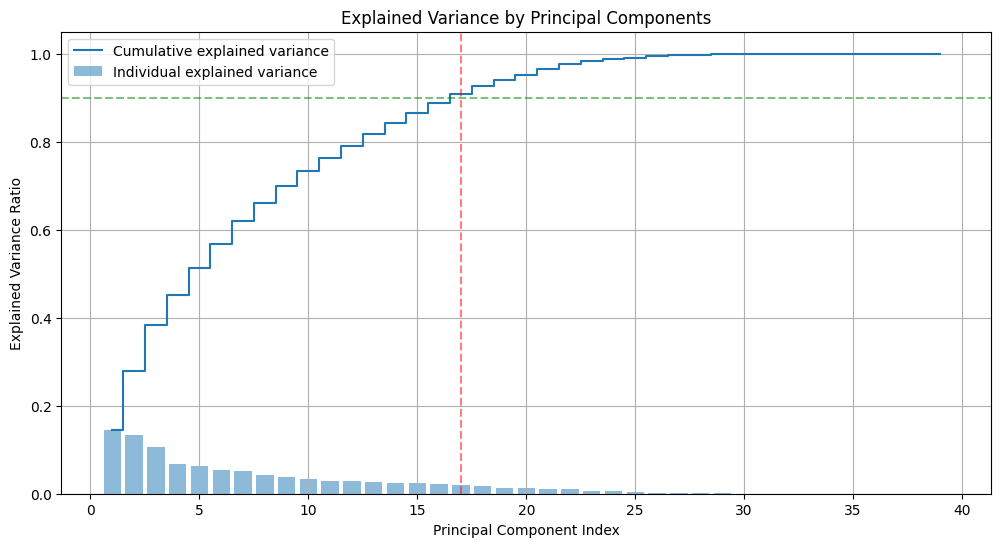

In [17]:
# Plot the explained variance ratio for each principal component (individual and cumulative)

plt.figure(figsize=(12, 6))

# Individual explained variance
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')

# Cumulative explained variance
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid', label='Cumulative explained variance')

plt.axvline(x = 17, color = 'red', linestyle = '--', alpha = 0.5)
plt.axhline(y = 0.90, color = 'green', linestyle = '--', alpha = 0.5)


plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Nous allons donc travailler par les 17 premiers composantes

In [18]:
# Apply PCA with 17 components
pca_17 = PCA(n_components=17)
df_pca_17 = pca_17.fit_transform(df_features_imputed)

# Create a DataFrame for the transformed data with 17 components
df_pca_17 = pd.DataFrame(df_pca_17, columns=[f'PC{i+1}' for i in range(17)])

# Add the target target back to the transformed dataset
df_pca_17[target] = df_imputed_iterative[target]

# Display the first few rows of the PCA-transformed dataset
df_pca_17.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,Reduction of Area (%)
0,0.717438,-1.946938,1.060955,0.020154,-0.505999,-1.134066,0.330626,0.225926,-0.666907,0.395850,0.088557,0.162888,-0.479431,-1.394565,-0.784622,-0.745525,0.135298,80.6
1,0.588250,-1.566787,0.938064,-0.010948,-0.581486,-1.121970,0.652934,1.044613,-0.921739,-0.375817,-0.718458,-0.850063,0.040159,-0.681727,-0.535956,-0.659444,-0.290727,80.6
2,0.542066,-1.977106,0.964423,0.066876,-0.235979,-1.141650,0.085275,-0.080475,-0.761858,0.303593,0.383747,0.010168,-0.377208,-0.784878,-0.663780,-0.528684,0.240753,80.6
3,0.412878,-1.596955,0.841532,0.035774,-0.311465,-1.129554,0.407584,0.738213,-1.016690,-0.468073,-0.423268,-1.002783,0.142382,-0.072040,-0.415114,-0.442603,-0.185271,80.6
4,0.274239,-1.956830,0.773588,0.119598,0.157495,-1.055367,-0.117159,-0.418592,-0.835895,0.147081,0.735749,-0.171624,-0.279814,-0.175214,-0.578334,-0.203796,0.310863,78.7


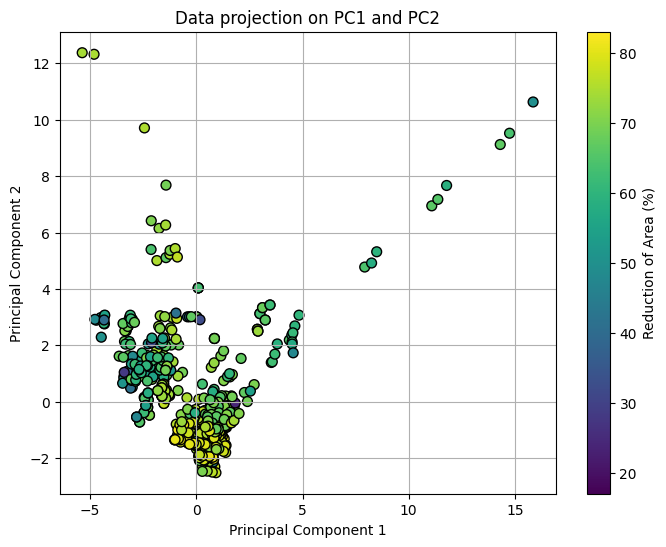

In [19]:
# Scatter plot of the first two principal components to visualize the data distribution in PCA space
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_17['PC1'], df_pca_17['PC2'], c=df_pca_17[target], cmap='viridis', edgecolor='k', s=50)
plt.colorbar(label=target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data projection on PC1 and PC2')
plt.grid(True)
plt.show()

Maintenant, on veut savoir qu'est ce qu'il influence le plus parmi les variables de départ sur le PC1

In [20]:
# Retrieve the PCA components (loadings) for PC1
pc1_loadings = pd.DataFrame(pca.components_[0], index=df_features_imputed.columns, columns=['PC1 Loadings'])

# Sort the loadings by absolute value to see which variables contribute the most to PC1
pc1_loadings_sorted = pc1_loadings.abs().sort_values(by='PC1 Loadings', ascending=False)

# Display the top variables contributing to PC1
pc1_loadings_sorted.head()


,PC1 Loadings
Tungsten concentration (weight%),0.380381
Cobalt concentration (weight%),0.351558
Heat input (kJmm-1),0.348581
Nitrogen concentration (weight%),0.270430
Chromium concentration (weight%),0.263775


In [21]:
df_pca_17.to_csv(f'Transformed data/pca_transformed_dataset_{trgt}.csv', index=False)


In [22]:
#save the pca model
import joblib
joblib.dump(pca, 'PCA model/pca_model.pkl')



['PCA model/pca_model.pkl']